In [91]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [92]:
df_world = pd.read_excel('rank/Word Rank University.xlsx')


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [93]:
# **Center Word Rank University INFO:**
# World rank: ranking if each uni world-wide
# University name same
# Location: country of the university
# Rest of the columns are considered as factors of ranking

# 1000 rows, and 6 columns

# A less well-known ranking from Saudi Arabia, 
# CWUR uses various indicators like research output and quality of faculty to rank universities

In [94]:
df_world.head()
# education rank measure: 25% based on academic success
# employement rank measure: 25% based on the professional success
# faculty measure: 10% based on number of faculty members who have received top academic distinctions
# research: 4 things:
# i) Research Output: measured by the total number of research articles (10%)
# ii) High-Quality Publications: measured by the number of research articles appearing in top-tier journals (10%)
# iii) Influence: measured by the number of research articles appearing in highly-influential journals (10%)
# iv) Citations: measured by the number of highly-cited research articles (10%)


,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [95]:
df_world.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [96]:
df_world['Location '].value_counts()  

Location 
USA                332
China              314
Japan              114
United Kingdom      93
France              76
                  ... 
Uruguay              1
Iceland              1
Armenia              1
Luxembourg           1
North Macedonia      1
Name: count, Length: 95, dtype: int64

In [97]:
df_world.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [98]:
df_world.shape

(2000, 9)

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [99]:
# The datasets were extracted from the data source of the ranking source itself 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [100]:
# Data in kaggle is up to date but just about an year ago, which is 2023
# But in the data source CWUR has an updated version in 2024

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [101]:
# Yes as we saw the data in the data source same as the data in kaggle 
# Check TIMES data

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [102]:
### Sample Selection ####
# Yes sample of data is relevant to the data source and relevant to our objective questions

##### Variable Selection #####
# all header columns are important to get insight, so we will keep them

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [103]:
df_world.duplicated().sum() # zero duplicates of all data set

0

In [104]:
df_world['World Rank'].duplicated().sum() # zero duplicate values

0

In [105]:
df_world['University Names'].duplicated().sum() # zero duplicate values

0

In [106]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [107]:
#Display number missing values per column

In [108]:
df_world.isnull().sum() # there are zero null values but there might be null values with spaces, dashes..etc

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [109]:
# check if there is spaces, slash as value
# (df_world['World Rank'] == ' ').sum()  # zero null values
#(df_world['World Rank'] == '-').sum()   # zero null values

In [110]:
# check if there is spaces, slash as value
#(df_world['University Names'] == ' ').sum()  # zero null values
#(df_world['University Names'] == '-').sum() # zero null values

In [111]:
# check if there is spaces, slash as value
#(df_world['Location '] == ' ').sum()  # zero null values
#(df_world['Location '] == '-').sum()  # zero null values

In [112]:
# check if there is spaces, slash as value
#(df_world['National Rank'] == ' ').sum() # zero null values
#(df_world['National Rank'] == '-').sum()  # zero null values

In [113]:
# check if there is spaces, slash as value
#(df_world['Educational Rank'] == ' ').sum()  # zero null values
# It's impossible to delete this column
(df_world['Educational Rank'] == '-').sum() # there is null values here as a '-'

1562

In [114]:
df_world['Educational Rank'].describe()

count     2000
unique     439
top          -
freq      1562
Name: Educational Rank, dtype: object

In [115]:
# check if there is spaces, slash as value
#(df_world['Faculty Rank'] == ' ').sum()  # zero null values
(df_world['Faculty Rank'] == '-').sum() # there is null values here as a '-'

1727

In [116]:
df_world['Faculty Rank'].describe()

count     2000
unique     262
top          -
freq      1727
Name: Faculty Rank, dtype: object

In [117]:
# check if there is spaces, slash as value
#(df_world['Research Rank'] == ' ').sum() 
(df_world['Research Rank'] == '-').sum() # there are null values here as a '-'

66

In [118]:
df_world['Research Rank'].describe()

count     2000
unique    1935
top          -
freq        66
Name: Research Rank, dtype: object

In [119]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [120]:
# check columns types 
# We can see that most of the columns header are considered as strings unless two: 
# National rank is an int, and S
df_world.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [121]:
# go to clean them 

In [122]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [123]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [124]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [125]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [126]:
# go back to 5th dimention --> Uniqueness
# we don't have any duplicates for the important columns the objective questions want 

In [127]:
# go back to 6th dimention --> Completeness


### Correcting errors

-------------------

In [128]:
# correcting column 'Educational Rank':
# Completeness step:
# we filled the null values that are representing as '-' with zero, 
# because we in the data source itself the dashes were there 
# and it might be hte university didn't fill the information needed to calculate the rank
df_world['Educational Rank'] = df_world['Educational Rank'].map(lambda x: '0' if x == '-' else x)
df_world['Educational Rank']

0        1
1        4
2       11
3        3
4        7
        ..
1995     0
1996     0
1997     0
1998     0
1999     0
Name: Educational Rank, Length: 2000, dtype: object

In [129]:
# correcting column 'Employability Rank' with filling the null values by zero because we might do calculation on that column that will be converted to int:
df_world['Employability Rank'] = df_world['Employability Rank'].map(lambda x: '0' if x == '-' else x)
#df_world

In [130]:
# correcting column 'Faculty Rank':
df_world['Faculty Rank'] = df_world['Faculty Rank'].map(lambda x: '0' if x == '-' else x)
#df_world

In [131]:
# correcting column 'Research Rank':
df_world['Research Rank'] = df_world['Research Rank'].map(lambda x: '0' if x == '-' else x)
#df_world

In [132]:
# go back to 7th dimension Accuracy 

In [133]:
df_world

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,0,0,0,1922,66.0


In [134]:
# Check Accuracy  
# we will change the follwing:
# 1. Remove the 'Top no%' of the World rank, because we only need a number to know who is in the top.
# 2. Remove what is after the '\n' in the university name, because we only want the name.
# 3. Change data types of the (World rank, National, Employement, Faculty, Research) ranks columns to be int.


In [135]:
# 1
df_world['World Rank'] = df_world['World Rank'].map(lambda r: int(r.split('Top')[0]))

df_world['World Rank']

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: World Rank, Length: 2000, dtype: int64

In [136]:
df_world.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [137]:
# 2


In [138]:
# 3
df_world.dtypes

World Rank              int64
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [139]:
df_world['Educational Rank'] = df_world['Educational Rank'].astype(int)

In [140]:
df_world['Employability Rank'] = df_world['Employability Rank'].astype(int)

In [141]:
df_world['Faculty Rank'] = df_world['Faculty Rank'].astype(int)

In [142]:
df_world['Research Rank']= df_world['Research Rank'].astype(int)

In [143]:
df_world.dtypes

World Rank              int64
University Names       object
Location               object
National Rank           int64
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

In [144]:
# change column name 'Location' to not have a space 
df_world.rename(columns={'Location ': 'Location'}, inplace=True)
#times.rename(columns=lambda x: x.strip(), inplace=True)

In [145]:
# make the university column shows only the name not the info provided in the column
df_world['University Names'] = df_world['University Names'].map(lambda x: x.split('\n')[0])

In [146]:
df_world.columns

Index(['World Rank', 'University Names', 'Location', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

Outliers in the 'Score' column (globally):
    World Rank                          University Names        Location  \
0            1                        Harvard University             USA   
1            2     Massachusetts Institute of Technology             USA   
2            3                       Stanford University             USA   
3            4                   University of Cambridge  United Kingdom   
4            5                      University of Oxford  United Kingdom   
..         ...                                       ...             ...   
94          95                     University of Arizona             USA   
95          96  École Polytechnique Fédérale de Lausanne     Switzerland   
96          97                   University of Göttingen         Germany   
97          98   University of California, Santa Barbara             USA   
98          99                Carnegie Mellon University             USA   

    National Rank  Educational Rank  Employa

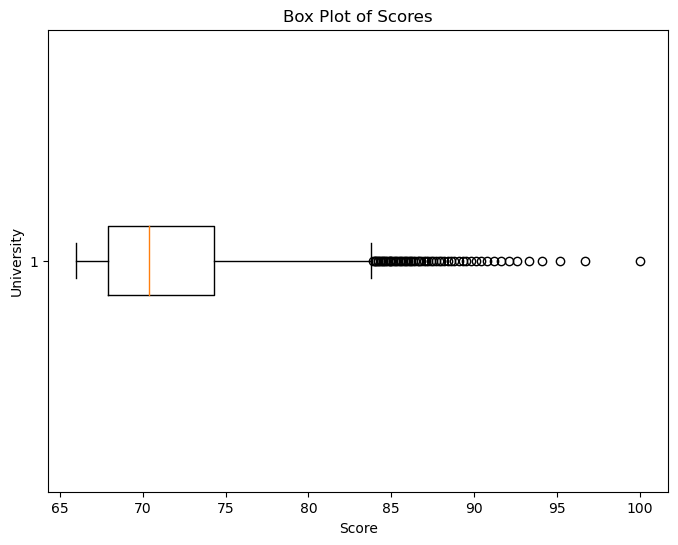

In [147]:
score_mean = df_world['Score'].mean()
score_std = df_world['Score'].std()

outlier_threshold = score_mean + 2 * score_std

outliers = df_world[df_world['Score'] > outlier_threshold]

print("Outliers in the 'Score' column (globally):")
print(outliers)

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df_world['Score'], vert=False)
ax.set_title('Box Plot of Scores')
ax.set_xlabel('Score')
ax.set_ylabel('University')
plt.show()  

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Questions and answers:

## Q1: Which universities are ranked in the top 10 globally?

Top 10 Universities ranked globally: 
Rank 1: Harvard University
Rank 2: Massachusetts Institute of Technology
Rank 3: Stanford University
Rank 4: University of Cambridge
Rank 5: University of Oxford
Rank 6: Princeton University
Rank 7: University of Chicago
Rank 8: Columbia University
Rank 9: University of Pennsylvania
Rank 10: Yale University


<function matplotlib.pyplot.show(close=None, block=None)>

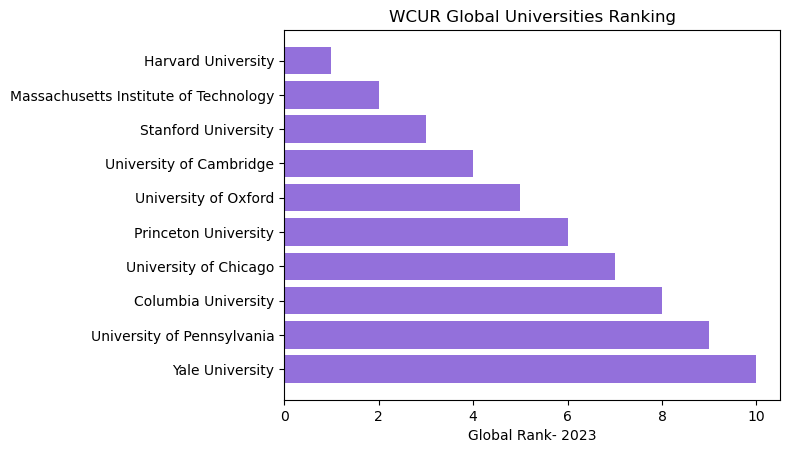

In [148]:
top_ten = df_world.head(10)
uni = list(map(lambda x: f"Rank {x['World Rank']}: {x['University Names']}", top_ten.to_dict('records')))

print('Top 10 Universities ranked globally: ')
for y in uni:
        print(y)
                    
top_ten = top_ten.sort_values(by = "World Rank", ascending = False)
plt.barh(top_ten['University Names'],top_ten['World Rank'], color = "mediumpurple")
plt.xlabel('Global Rank- 2023')
plt.title('WCUR Global Universities Ranking')
plt.show

In [149]:
df_world.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


In [150]:
df_world.sort_values(by='Score', ascending=False).head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


## Q2: Which universities are ranked in the top 10 for employment outcomes?

In [151]:
df_employability_rank = df_world[['Employability Rank']]
df_employability_rank


,Employability Rank
0,1
1,12
2,4
3,25
4,27
...,...
1995,0
1996,1322
1997,0
1998,0


In [152]:
df_world[(df_world['Employability Rank'] >= 1)].sort_values(by = 'Employability Rank').head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
119,120,INSEAD,France,6,0,2,0,1710,81.1
210,211,Institut national du service public,France,11,0,3,0,0,78.5
2,3,Stanford University,USA,3,11,4,2,2,95.2
273,274,China Europe International Business School,China,32,0,5,0,0,77.3
12,13,University of Tokyo,Japan,1,37,6,113,30,89.8
279,280,HEC Paris,France,15,0,7,0,0,77.2
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
44,45,Institut Polytechnique de Paris,France,5,102,9,188,370,85.1
405,406,International Institute for Management Develop...,Switzerland,8,0,10,0,0,75.3


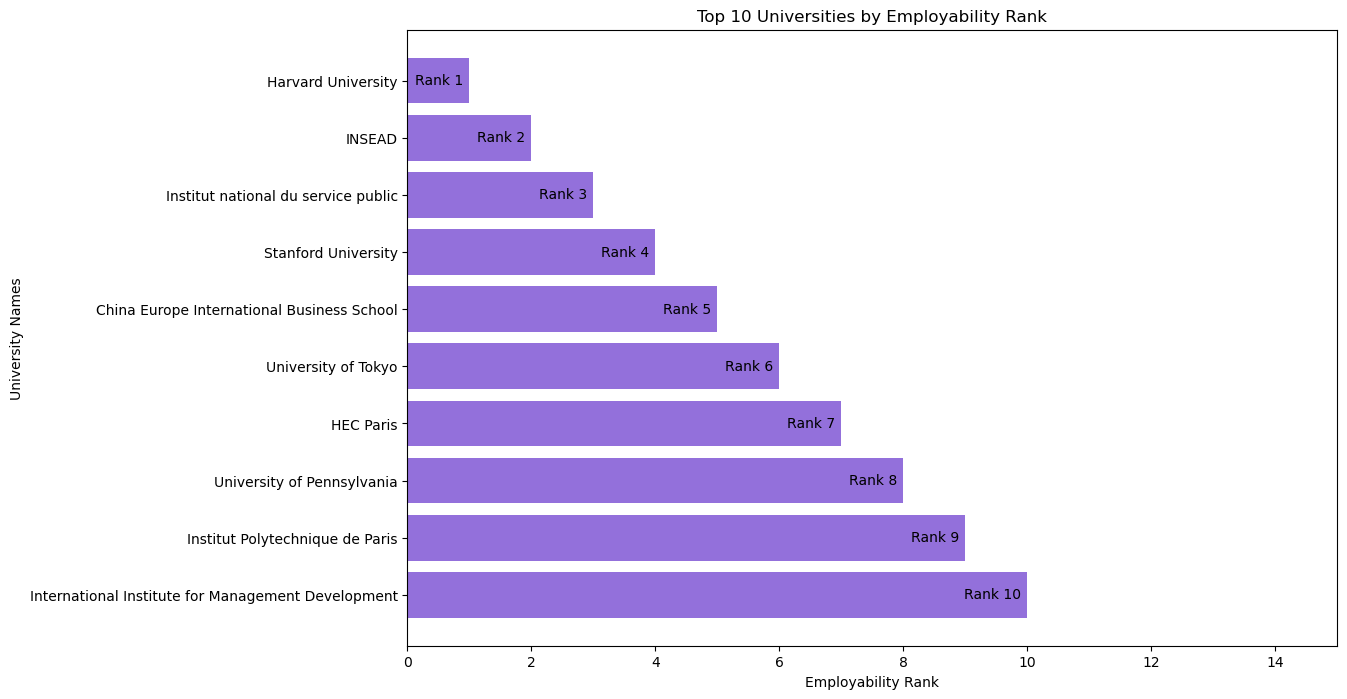

In [153]:
top_emp = (df_world[(df_world['Employability Rank'] >= 1) & (df_world['Employability Rank'] <= 10)]).sort_values(by = 'Employability Rank')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_emp['University Names'], top_emp['Employability Rank'],  color = "mediumpurple")
plt.xlabel('Employability Rank')
plt.ylabel('University Names')
plt.title('Top 10 Universities by Employability Rank')


for bar, global_rank in zip(bars, top_emp['Employability Rank']):
    plt.text(bar.get_width()-0.1, bar.get_y() + bar.get_height() / 2,
             f'Rank {global_rank}', 
             va='center', ha='right', color='black')

plt.gca().invert_yaxis()  # Highest rank (1) at the top
plt.xlim(0, max(top_emp['Employability Rank']) + 5)  
plt.show()


In [154]:
#top_emp.head(10)

In [155]:
uni = list(map(lambda x: f"Rank {x['Employability Rank']}: {x['University Names']}", top_emp.to_dict('records')))

print('Top 10 universities in employement rank: ')
for y in uni:
        print(y)

Top 10 universities in employement rank: 
Rank 1: Harvard University
Rank 2: INSEAD
Rank 3: Institut national du service public
Rank 4: Stanford University
Rank 5: China Europe International Business School
Rank 6: University of Tokyo
Rank 7: HEC Paris
Rank 8: University of Pennsylvania
Rank 9: Institut Polytechnique de Paris
Rank 10: International Institute for Management Development


In [156]:
df_world

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,Bharathidasan University,India,64,0,0,0,1922,66.0


## Q3: What positions do universities in Saudi Arabia hold within the global rankings?

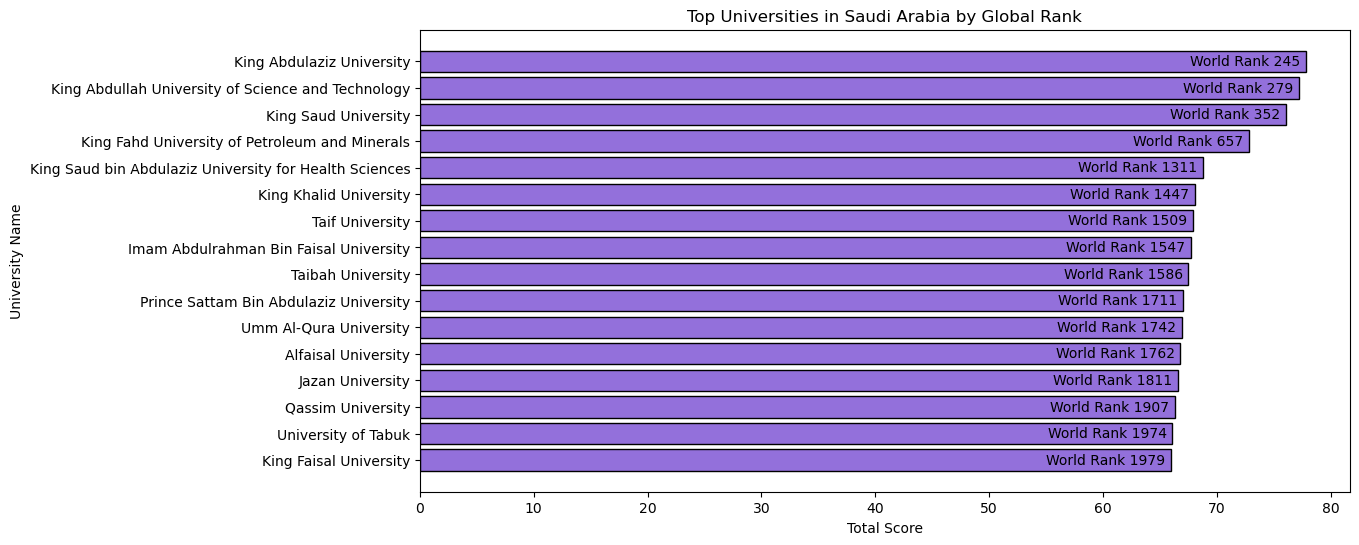

In [157]:
df_world[df_world['Location'] == 'Saudi Arabia']

# Filter to get universities from Saudi Arabia
saudi_unis = df_world[df_world['Location'] == 'Saudi Arabia']

# Sort the data to get the top 10 universities
top_10_saudi_unis = saudi_unis.sort_values('World Rank')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
bars = ax.barh(top_10_saudi_unis['University Names'], top_10_saudi_unis['Score'], 
              color='mediumpurple', edgecolor='black')

# Set the axis labels and title
ax.set_xlabel('Total Score')
ax.set_ylabel('University Name')
ax.set_title('Top Universities in Saudi Arabia by Global Rank')

# Rotate the y-axis labels for readability
plt.xticks(rotation=0)

#
for i, bar in enumerate(bars):
    ax.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height()/2, 
             f'World Rank {top_10_saudi_unis.iloc[i]["World Rank"]}', 
             va='center', ha='right', color='black')

# Invert the y-axis to show the highest rank (1) at the top
ax.invert_yaxis()

# Adding grid lines
#ax.grid(axis='x', linestyle='-', color='white')

plt.show()

In [158]:
saudi_uni = df_world[df_world['Location'] == 'Saudi Arabia']
# The first University from Saudi Arabia'World Rank is King Abdulaziz University in rank 245, 
# King Abdullah University of Science and Technology is on 2nd National Rank and 279 globally 
# King Faisal University is the last on National Rank and 1979 globally

In [159]:
saudi_uni[['World Rank', 'University Names', 'Score']]

,World Rank,University Names,Score
244,245,King Abdulaziz University,77.8
278,279,King Abdullah University of Science and Techno...,77.2
351,352,King Saud University,76.1
656,657,King Fahd University of Petroleum and Minerals,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,68.8
1446,1447,King Khalid University,68.1
1508,1509,Taif University,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,67.7
1585,1586,Taibah University,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,67.0


In [160]:
saudi_uni = df_world[df_world['Location'] == 'Saudi Arabia']
uni = list(map(lambda row: f"Rank {row['World Rank']}: {row['University Names']}", saudi_uni.to_dict('records')))

print('universities in Saudi Arabia ranked globally:')
for y in uni:
    print(y)

universities in Saudi Arabia ranked globally:
Rank 245: King Abdulaziz University
Rank 279: King Abdullah University of Science and Technology
Rank 352: King Saud University
Rank 657: King Fahd University of Petroleum and Minerals
Rank 1311: King Saud bin Abdulaziz University for Health Sciences
Rank 1447: King Khalid University
Rank 1509: Taif University
Rank 1547: Imam Abdulrahman Bin Faisal University
Rank 1586: Taibah University
Rank 1711: Prince Sattam Bin Abdulaziz University
Rank 1742: Umm Al-Qura University
Rank 1762: Alfaisal University
Rank 1811: Jazan University
Rank 1907: Qassim University
Rank 1974: University of Tabuk
Rank 1979: King Faisal University


## Q4: Considering various factors (variables) such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


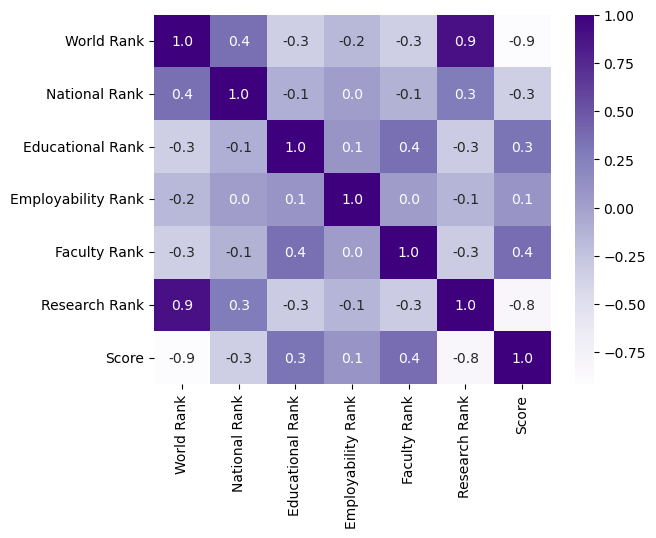

In [161]:
from scipy.stats import pearsonr

q4 = df_world.drop(['University Names', 'Location'], axis=1)

corr_matrix = q4.corr(method='pearson')

sns.heatmap(corr_matrix,
            annot=True, 
            cmap='Purples',
            fmt=".1f"
           )
df_world.head(10)


#### Back to documents to see answer

## Q5: Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


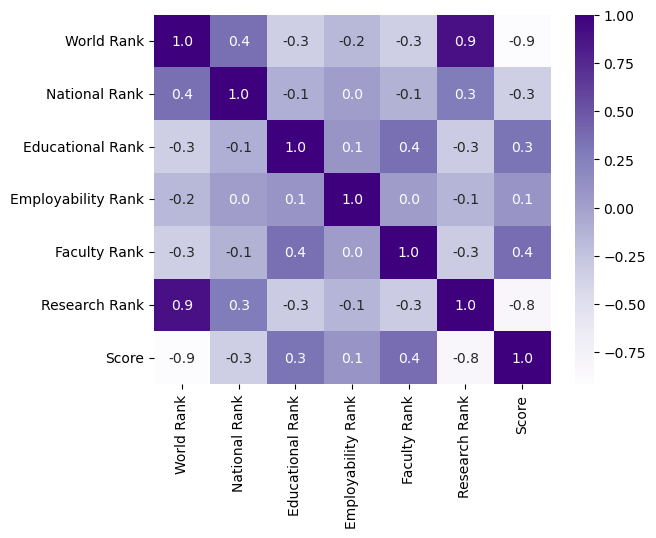

In [162]:
# Yes, there is a slight corrolation between them. 
# Example of this id Harvard University
from scipy.stats import pearsonr

q4 = df_world.drop(['University Names', 'Location'], axis=1)

corr_matrix = q4.corr(method='pearson')

# the heatmap answer the first question
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='Purples',
            fmt=".1f",
           )
df_world.head(20)


In [163]:
#Filter world rank to give the top 100
top_100 = df_world[df_world['World Rank'] <= 100]

#Count the number of top-100 universities per country
country = top_100['Location'].value_counts()
country



Location
USA               50
United Kingdom     9
China              6
Germany            6
France             5
Canada             4
Netherlands        4
Japan              3
Switzerland        3
Sweden             2
Australia          2
Israel             2
South Korea        1
Denmark            1
Singapore          1
Norway             1
Name: count, dtype: int64

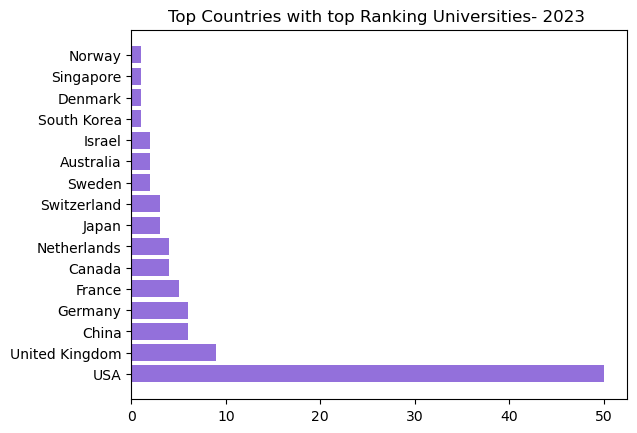

In [164]:
plt.barh(country.index, 
         country.values,
        color=('mediumpurple')
        )

plt.title('Top Countries with top Ranking Universities- 2023 ')
plt.show()
# Based on the bar chart below we recommend USA